# Compute dradowns

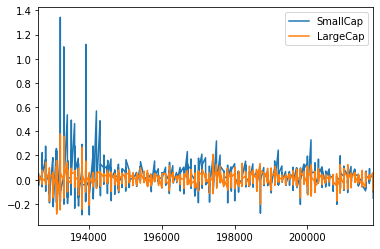

In [1]:
import pandas as pd
import numpy as np

me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                  header=0,
                  index_col=0,
                  parse_dates=True, 
                  na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [2]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [3]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [5]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [6]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [9]:
rets['2006']

,SmallCap,LargeCap
2006-01,0.0888,0.0283
2006-02,0.0141,0.0057
2006-03,0.0488,0.0121
2006-04,0.0095,0.0159
2006-05,-0.0524,-0.0190
2006-06,-0.0138,0.0021
2006-07,-0.0361,-0.0038
2006-08,0.0138,0.0206
2006-09,0.0064,0.0281
2006-10,0.0473,0.0323


In [10]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [11]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
SmallCap    1110 non-null float64
LargeCap    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


## Compute Drawdown

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown as a percentage

In [59]:
wealth_index = 1000*(1 + rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

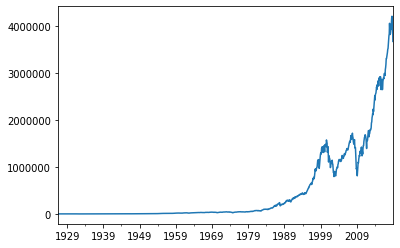

In [13]:
wealth_index.plot.line()

In [14]:
previous_peaks = wealth_index.cummax()

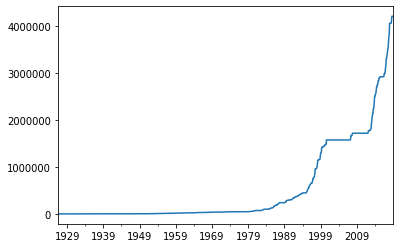

In [16]:
previous_peaks.plot.line()

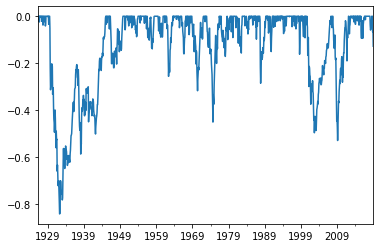

In [20]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

In [21]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [24]:
drawdown.min()

-0.8400375277943123

In [28]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [29]:
drawdown.idxmin() # The big crash

Period('1932-05', 'M')

In [31]:
def drawdown(return_series: pd.Series):
    """
    Toma una serie temporal de retornos
    Calcula y devuelve una DataFrame que contiene 
    - wealth index
    - previous peaks
    - percent drawdowns
    """
    wealth_index = 1000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    percent_drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index, 
        "Peaks": previous_peaks,
        "Drawdown": percent_drawdown
    })

In [38]:
drawdown_returs = drawdown(rets["LargeCap"])

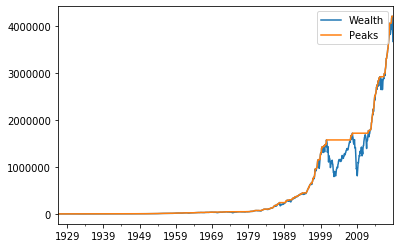

In [41]:
drawdown_returs[["Wealth", "Peaks"]].plot()

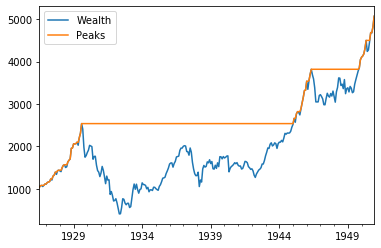

In [46]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [50]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [56]:
drawdown(rets["1975":]["SmallCap"])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [57]:
drawdown(rets["1975":]["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')